# Data Incubator Project: Exploring the MEPS database - Asset 2
## MEPS HC-183: MEPS Panel 19 Longitudinal Data File
Description: This file is a two-year longitudinal file derived from the respondents to the MEPS Panel 19 sample. The persons on this data set represent those who were in the MEPS population (U.S. civilian noninstitutionalized) for all or part of the 2014-2015 period. The file contains a longitudinal weight variable (LONGWT) and all variables from the 2014 and 2015 full-year consolidated data files (HC-171 and HC-181, respectively). The weight variable (LONGWT), when applied to the persons who participated in both 2014 and 2015, will enable the user to make national estimates of person-level changes in selected variables (e.g., health insurance, health status, utilization and expenditures). In addition, LONGWT can be used to develop cross-sectional type estimates for the two-year period and for each year individually based on only the Panel 19 sample.

In [1]:
# Import Dependencied
import os.path
from os import path
import ntpath
import requests
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
local_dir='C:\\Users\\wc11\\OneDrive\\Documents\\Graduate Research\\PPMI_2020\\'
url = 'https://meps.ahrq.gov/mepsweb/data_files/pufs/h183ssp.zip'
zip_name = ntpath.basename(url)
dir_name = os.path.splitext(zip_name)[0]

In [3]:
if not path.exists(local_dir + dir_name):
    print('Downloading data...', end = ' ')
    myfile = requests.get(url)
    open(local_dir + zip_name, 'wb').write(myfile.content)
    print('Done')

    print('Unzipping...', end = ' ')
    with ZipFile(local_dir + zip_name, 'r') as zipObj:
        zipObj.extractall(local_dir + dir_name)
    print('Done')
else:
    print('Data already downloaded, skipping')

Data already downloaded, skipping


In [4]:
print('Reading in file...', end = ' ')
file = local_dir + dir_name + '\\h183.csv'
data = pd.read_csv(file)
print('Done')
data.head()

Reading in file... Done


,Unnamed: 0,DUID,PID,DUPERSID,PANEL,YEARIND,SAQRDS24,ALL5RDS,DIED,INST,...,RXOSRY1,RXOSRY2,RXPTRY1,RXPTRY2,RXOTHY1,RXOTHY2,VARPSU,VARSTR,LONGWT,LSAQWT
0,1,60001,101,60001101,19,1,1,1,0,0,...,0,0,0,0,17,0,1,1019,39761.667305,44377.148888
1,2,60001,102,60001102,19,1,1,1,0,0,...,0,0,0,0,0,4,1,1019,38812.991354,44987.121771
2,3,60001,103,60001103,19,1,1,1,0,0,...,0,0,0,0,0,0,1,1019,46083.339064,66456.525430
3,4,60001,104,60001104,19,1,1,1,0,0,...,0,0,0,0,0,0,1,1019,37196.263715,40325.054495
4,5,60001,105,60001105,19,1,0,1,0,0,...,0,0,0,0,0,265,1,1019,44365.766126,0.000000


In [6]:
def ttest_check(cat_A, cat_B, skip_plot = False):
    # cat_A is a binary metric where 1 is YES, 2 is NO
    # cat_B is a scalar metric where values < 0 are ignored
    # Run an independent samples TTEST between YES and NO
    t, p = stats.ttest_ind(data.loc[(data[cat_A] == 1) & (data[cat_B] >= 0), cat_B], 
                        data.loc[(data[cat_A] == 2) & (data[cat_B] >= 0), cat_B])

    grp_y_mean = data.loc[(data[cat_A] == 1) & (data[cat_B] >= 0), cat_B].mean()
    grp_n_mean = data.loc[(data[cat_A] == 2) & (data[cat_B] >= 0), cat_B].mean()
    if grp_y_mean > grp_n_mean:
        note = '(Yes > No)'
    else:
        note = '(No > Yes)'
 
    print('{}: p-value for Yes vs. No: {} {}'.format(cat_A, p, note))

    # Create a boxplot comparing the groups
    if skip_plot is False:
        plt.boxplot([data.loc[(data[cat_A] == 1) & (data[cat_B] >= 0),cat_B], 
                    data.loc[(data[cat_A] == 2) & (data[cat_B] >= 0),cat_B]],
                    showmeans=True)
        plt.xticks([1, 2],['YES', 'NO'])
        plt.xlabel(cat_A)
        plt.ylabel(cat_B)
        plt.show()

In [10]:
def corr_check_diag(cat_A, cat_B, skip_plot = False):
    # Calculate Pearson's Correlation Coefficient btwn two scalar metrics
    corr, _ = stats.pearsonr(data.loc[(data[cat_A] >= 0) & (data[cat_B] >= 0),cat_A],
                data.loc[(data[cat_A] >= 0) & (data[cat_B] >= 0),cat_B])
    print('{} vs. {}: Pearson\'s: {}'.format(cat_A, cat_B, corr))

    # Display Scatterplot
    if skip_plot is False:
        plt.scatter(data.loc[(data[cat_A] >= 0) & (data[cat_B] >= 0),cat_A],
                    data.loc[(data[cat_A] >= 0) & (data[cat_B] >= 0),cat_B])
        plt.title('{} vs. {}'.format(cat_A, cat_B))
        plt.xlabel(cat_A)
        plt.ylabel(cat_B)
        plt.show()

### People with diagnosis of high blood pressure miss more workdays due to illness/injury

In [8]:
ttest_check('HIBPDXY2', 'DDNWRKY2', True)

HIBPDXY2: p-value for Yes vs. No: 2.636517812437048e-09 (Yes > No)


### People that currently smoke miss more workdays due to illness/injury

In [9]:
ttest_check('ADSMOK4', 'DDNWRKY2', True)

ADSMOK4: p-value for Yes vs. No: 0.024578501974979388 (Yes > No)


These findings are as expected but emphasize the fact that programs that lead to reduced blood pressure and smoking will likely lead to less missed workdays due to illness/injury

### No evidence of an association between number of chiropractor visits and missed workdays due to illness/injury

AMCHIRY2 vs. DDNWRKY2: Pearson's: 0.05666455887454476


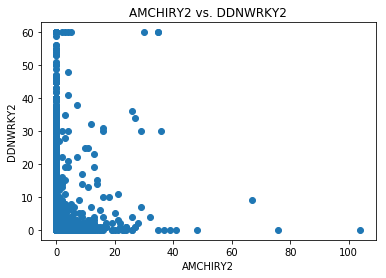

In [11]:
corr_check_diag('AMCHIRY2', 'DDNWRKY2',False)

These findings have implications about the necesssity of chiropractor visits

## Insurance
Information about who is insured and what type of insurance they have

### Uninsured patients miss less workdays due to illness/injury

In [12]:
ttest_check('UNINSY2','DDNWRKY2', True)

UNINSY2: p-value for Yes vs. No: 2.2878477736463308e-07 (No > Yes)


This potentially inducates that uninsured patients are not choosing to participate in procedures they consider to be elective but that they might have done if they were insured. This may also indicate a systemic issue of hospitals providing a shorter duration of care for individuals that are uninsured

### Employers Union Insurance holders miss more work days due to illness/injury compared to others

In [13]:
ttest_check('HPEJAY2','DDNWRKY2',True)

HPEJAY2: p-value for Yes vs. No: 0.02317384792717033 (Yes > No)


### Private Insurance holders miss more work days due to illness/injury compared to others

In [14]:
ttest_check('HPRJAY2','DDNWRKY2',True)

HPRJAY2: p-value for Yes vs. No: 0.04678655439473543 (Yes > No)


### No evidence for the relationship between with and without nongroup insurance and missed workdays

In [15]:
ttest_check('HPNJAY2','DDNWRKY2',True)

HPNJAY2: p-value for Yes vs. No: 0.28865926615631177 (No > Yes)


Preliminary analyses imply that the type of insurance can have an effect on the type and duration of care that people receive. Further analysis is needed to establish the source of this relationship.